In [1]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

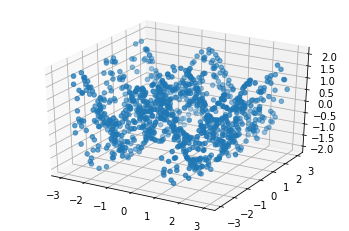

In [2]:
# Create dataset
N = 1000                                # Number of points
X = np.random.random((N, 2)) * 6 - 3    # Uniform distribution from -3 to 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) # Generate the Ys

# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)

In [3]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(2,), activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss="mse")
r = model.fit(X, Y, epochs=250, verbose=0)

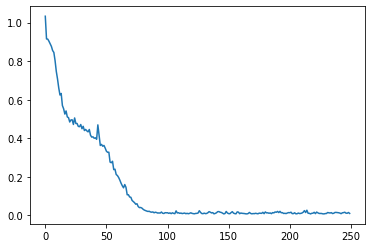

In [4]:
plt.plot(r.history["loss"], label="loss")

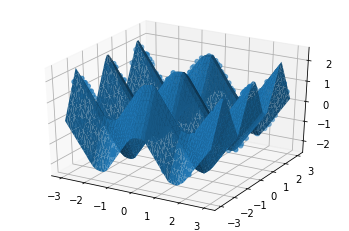

In [5]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

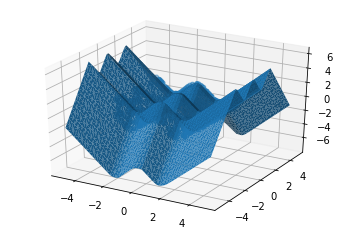

In [6]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)


plt.show()